<a href="https://colab.research.google.com/github/netobrandao/ImmigrationCanada/blob/main/Canad%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Immigration to Canada

Analise dos dados referente a imigração canadense

Fonte: https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada

##Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Carregando os dados

In [2]:
#carregando o dataset
data = pd.read_csv('https://raw.githubusercontent.com/netobrandao/ImmigrationCanada/main/canadian_immegration_data.csv')
data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


##Barras


<ipython-input-3-7b7f86e01b97>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent = pd.DataFrame(data.groupby(by='Continent').sum().sort_values(by='Total',ascending=False)['Total']).reset_index()


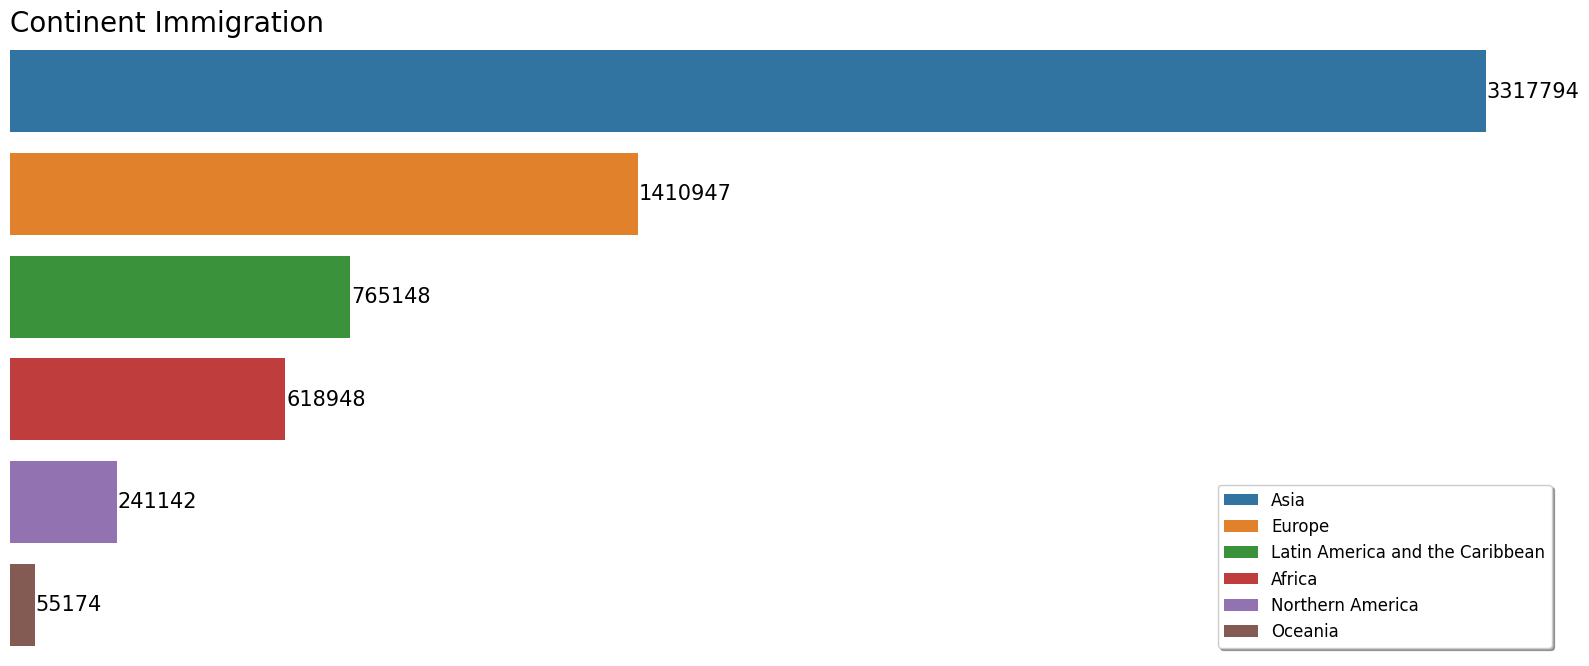

In [3]:
#Grafico de barras por continente

#criação da tabela para consulta
continent = pd.DataFrame(data.groupby(by='Continent').sum().sort_values(by='Total',ascending=False)['Total']).reset_index()
continent

#Criando a figura
fig,ax = plt.subplots(figsize=(20,8))
#Plotando o grafico
ax = sns.barplot(data=continent,y='Continent',x='Total',orient='h',label=list(continent['Continent']))
#Parametros do grafico
ax.set_title('Continent Immigration',size=20,loc='left')
ax.set_yticks([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.get_xaxis().set_visible(False)
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=12)
plt.legend(list(continent['Continent']),shadow=True,fontsize=12)
for i, v in enumerate(continent['Total']):
    ax.text(v + 1500, i, str(v), color='black', fontsize=15, ha='left', va='center')
#salvando a figura
plt.savefig('canada1.png',format='png')
plt.show()



*   Asia é o continente com o maior numero de imigrantes;
*   Europa é o segundo maior, sendo que asia tem mais do que o dobro;
*   Latin America e Africa estão bem proximos em numero de imigrantes;
*   Northern America e Oceania tem o menor numero de imigrantes tendo uma grande diferenca entre Northern America e Oceania.



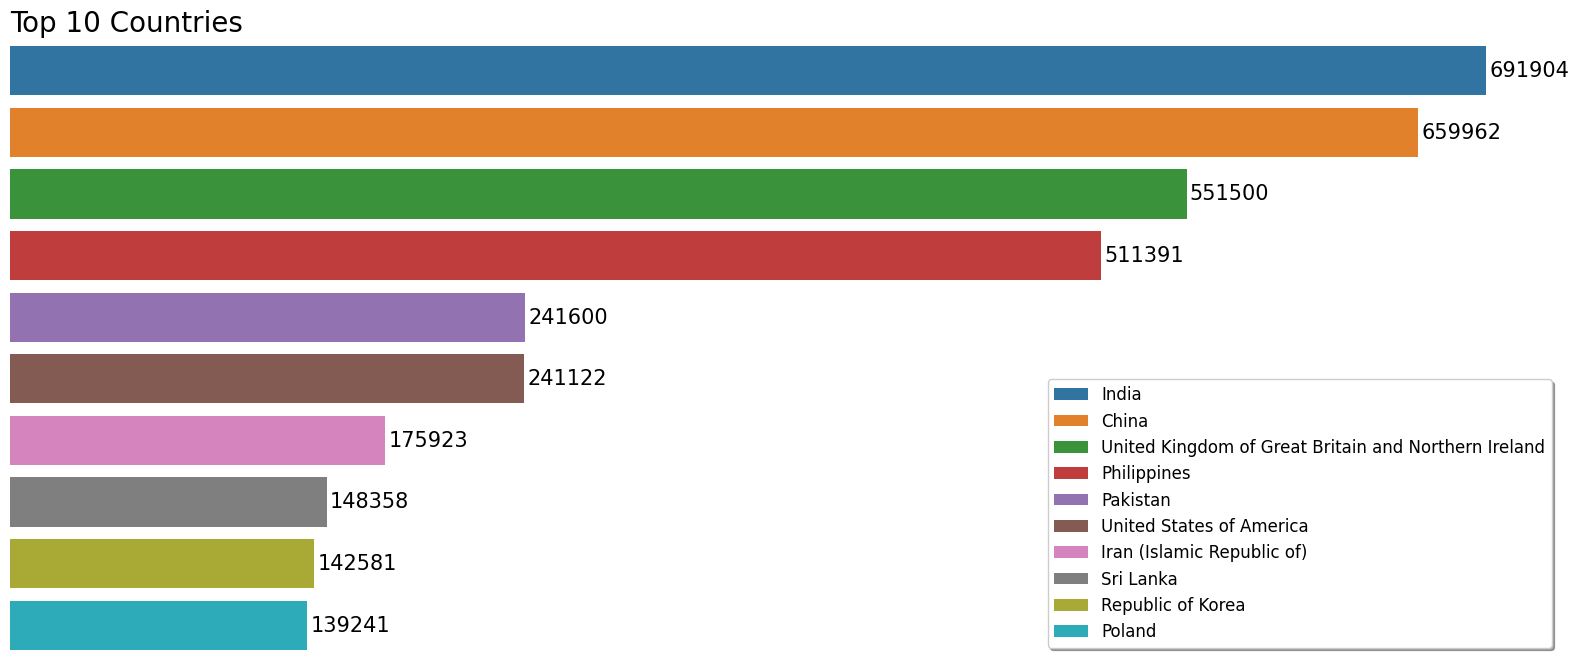

In [4]:
#grafico de barras Top 10 Paises

#criação da tabela para consulta
country = data.sort_values(by='Total',ascending=False)
country.drop(columns=['Continent','Region','DevName'],inplace=True)
country
#Criando a figura
fig,ax = plt.subplots(figsize=(20,8))
#Plotando o grafico
ax = sns.barplot(data=country[0:10],y='Country',x='Total',orient='h',label=list(country.Country[0:10]))
#Parametros do grafico
ax.set_title('Top 10 Countries',size=20,loc='left')
ax.set_yticks([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.get_xaxis().set_visible(False)
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=12)
plt.legend(list(country.Country[0:10]),shadow=True,fontsize=12)
for i, v in enumerate(country['Total'][0:10]):
    ax.text(v + 1500, i, str(v), color='black', fontsize=15, ha='left', va='center')
#salvando a figura
plt.savefig('canada2.png',format='png')
plt.show()



*   China lidera em numero de imigrantes;
*   India é o segundo colocado;
*   Dos 10 paises que mais enviaram imigrantes ao canadá, 7 são do continente asiatico;
*   Latin America e Africa não possuem representantes nos 10 paises que mais enviaram imigrantes.



<ipython-input-5-b8728627ab44>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region = pd.DataFrame(data.groupby(by='Region').sum().sort_values(by='Total',ascending=False)).reset_index()


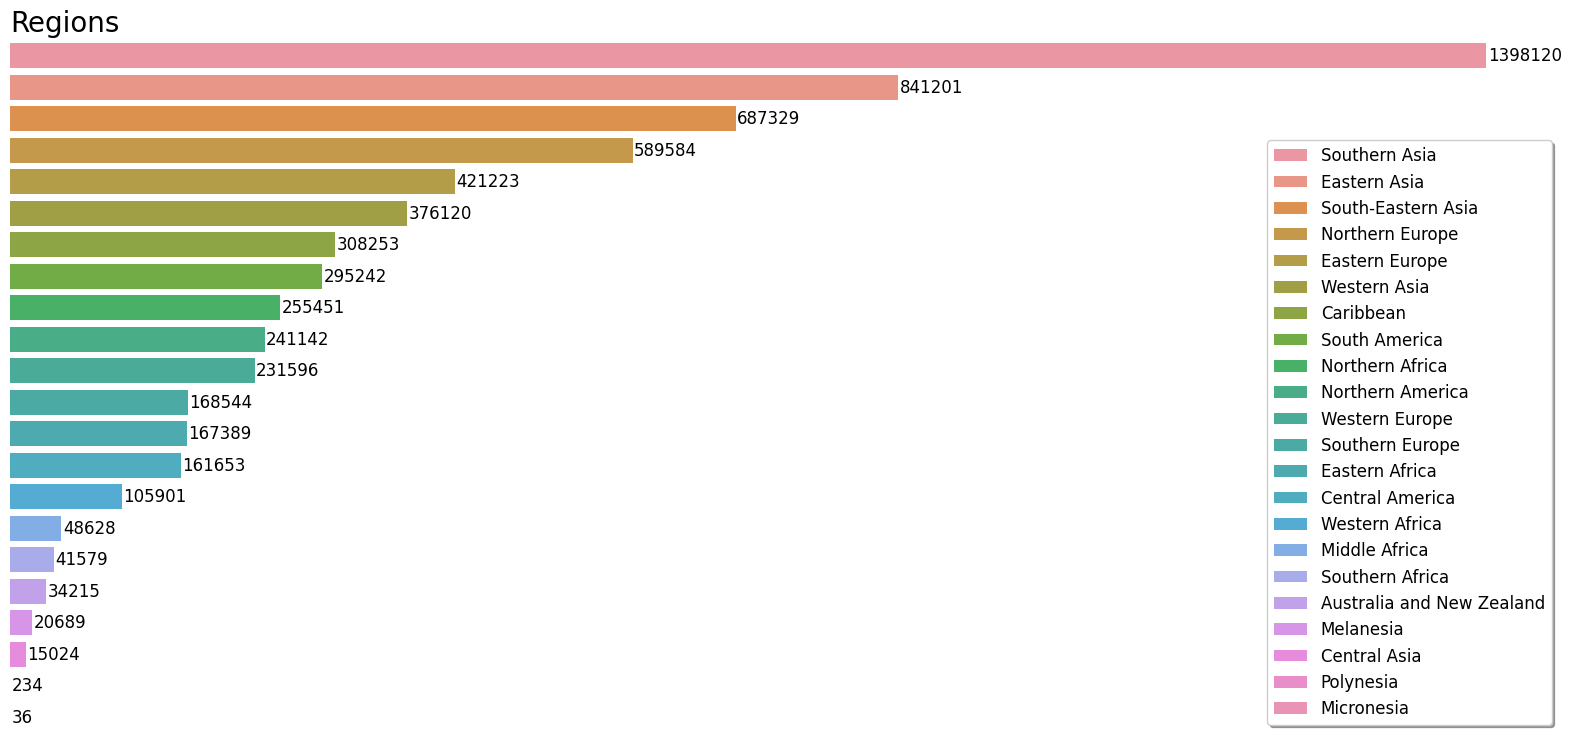

In [5]:
#grafico de barras por região continental

#criação da tabela para consulta
region = pd.DataFrame(data.groupby(by='Region').sum().sort_values(by='Total',ascending=False)).reset_index()
region


#Criando a figura
fig,ax = plt.subplots(figsize=(20,9))
#Plotando o grafico
ax = sns.barplot(data=region,y='Region',x='Total',orient='h',label=list(region.Region))
#Parametros do grafico
ax.set_title('Regions',size=20,loc='left')
ax.set_yticks([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.get_xaxis().set_visible(False)
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=12)
plt.legend(list(region.Region),shadow=True,fontsize=12)
for i, v in enumerate(region['Total']):
    ax.text(v + 1500, i, str(v), color='black', fontsize=12, ha='left', va='center')
#salvando a figura
plt.savefig('canada3.png',format='png')
plt.show()



*   As 3 primeiras regiões que lideram são asiaticas;
*   Southern Asia é o lider em numero de imigrantes tendo quase o dobro do 2 colocado.



<ipython-input-6-de6c17f5f917>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  devname = pd.DataFrame(data.groupby(by='DevName').sum().sort_values(by='Total',ascending=False)).reset_index()


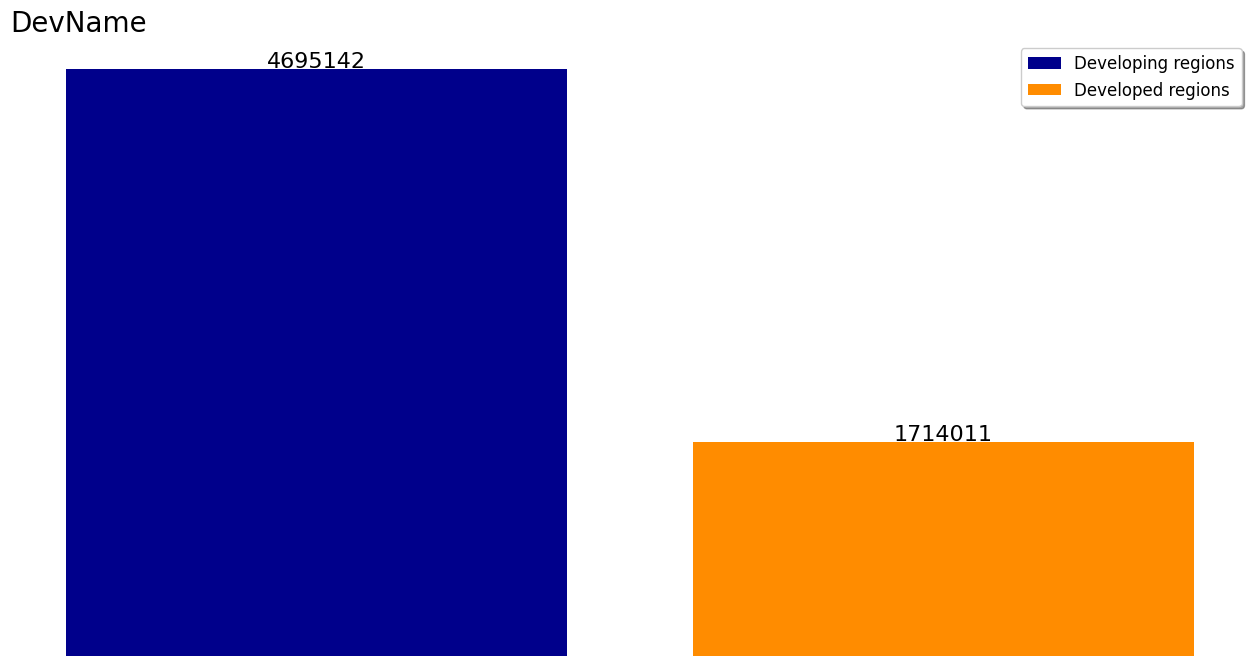

In [6]:
#Grafico de barras por DevName

#Criando tabela para consulta
devname = pd.DataFrame(data.groupby(by='DevName').sum().sort_values(by='Total',ascending=False)).reset_index()
devname

#Criando a figura
fig,ax = plt.subplots(figsize=(16,8))
#Plotando o grafico
plt.bar(devname['DevName'],devname['Total'],label=list(devname.DevName),color=['darkblue','darkorange'])
#Parametros do grafico
ax.set_title('DevName',size=20,loc='left')
ax.set_yticks([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.get_xaxis().set_visible(False)
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=12)
plt.legend(list(devname.DevName),shadow=True,fontsize=12)
for i in ax.patches:
    ax.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=16,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')


#for i, v in enumerate(devname['Total']):
    #ax.text(v + 1500, i, str(v), color='black', fontsize=12, ha='center', va='center')

#salvando a figura
plt.savefig('canada4.png',format='png')
plt.show()



*   O grafico mostra que países em desenvolvimento tendem a enviar mais imigrantes do que países desenvolvidos;
*   A diferença entre os os numeros são mais que o dobro.



##Linhas

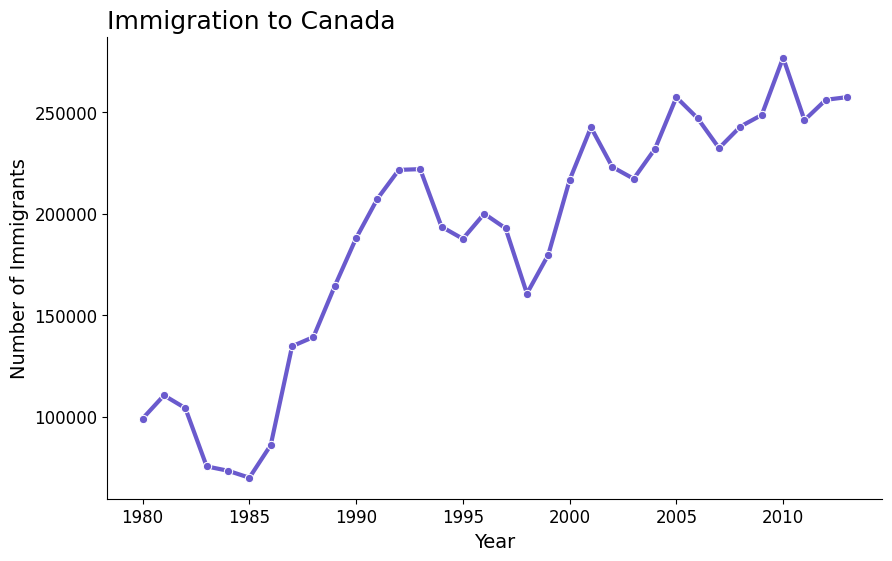

In [7]:
#Serie temporal de imigração

#Criando tabela para consulta
years = pd.DataFrame(data[list(data.columns[4:38])].sum(),columns=['Immigrants'])
years
#Criando Figura
fig , ax = plt.subplots(figsize=(10,6))
#Criando Grafico
ax = sns.lineplot(data=years,x=years.index,y=years['Immigrants'],lw=3,color='slateblue',marker='o')
#Parametros do Grafico
ax.set_title('Immigration to Canada',loc='left',fontsize=18)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Number of Immigrants',fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.tick_params(axis='both', which='both', length=0)
plt.savefig('canada5.png', format='png')
plt.show()




*   O numero de imigrantes tem uma tendencia de alta final dos anos 80 tendo uma queda na metade da decada de 90;
*   O numero de imigrantes voltou a subir no inicio dos anos 2000;
*   O maior numeros de imigrantes recebidos pelo canadá foi no ano de 2013.



In [8]:
#Serie temporal da imigração por continente

#Criando tabela de consulta
continent1 = data.groupby(by='Continent').sum().T
continent1.drop('Total',axis=0,inplace=True)
continent1

#Grafico
fig1 = px.line(continent1,x=continent1.index,y=continent1.columns)
#parametros do grafico
fig1.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    xaxis_title='Year',
    yaxis_title='Number of Immigrants')

#salvando html
fig1.write_html('Immigration.html')
fig1.show()

<ipython-input-8-80843e1d94a2>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent1 = data.groupby(by='Continent').sum().T




*   Asia é o continente que mais envia imigrantes
*   A diferença entre a Asia e os outros continentes é muito alta
*   Europa e Asia tem numeros parecidos até o incio dos anos 90



In [9]:
#Serie temporal da imigração paises top10

#Criando tabela de consulta
country1 = data.groupby(by='Country').sum().sort_values(by='Total',ascending=False).T
country1.drop('Total',axis=0,inplace=True)
country1

#Grafico
fig1 = px.line(country1,x=country1.index,y=country1.columns[0:10])
#parametros do grafico
fig1.update_layout(
    width=1200, height=500,
    xaxis={'tickangle': -45},
    xaxis_title='Year',
    yaxis_title='Number of Immigrants')

#salvando html
fig1.write_html('Immigration1.html')
fig1.show()

<ipython-input-9-c8ac8ee1d973>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.





*   China, India e Filipinas tem numeros muito proximos;
*   O maior numero de imigrantes foi registrado pela china em 2005;
*   Reino Unido tem forte alta até a metade da decada de 90 depois o numero sofre uma queda.



In [10]:
#Serie temporal de imigração por region

#Criando tabela para consulta
region1 = data.groupby(by='Region').sum().sort_values(by='Total',ascending=False).T
region1.drop('Total',axis=0,inplace=True)
region1

#Grafico
fig1 = px.line(region1,x=region1.index,y=region1.columns)

#parametros do grafico
fig1.update_layout(
    width=1200, height=500,
    xaxis={'tickangle': -45},
    xaxis_title='Year',
    yaxis_title='Number of Immigrants')

#salvando html
fig1.write_html('Immigration1.html')
fig1.show()

<ipython-input-10-f8ac5f8e7da3>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.





*   Southern Asia tem uma alta crescente
*   Eastern Asia tem uma alta crescente
*   South-Eastern Asia tem uma alta a partir de 2005
*   As demais regiões tem numeros muito proximos




<ipython-input-11-1886f68116ee>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



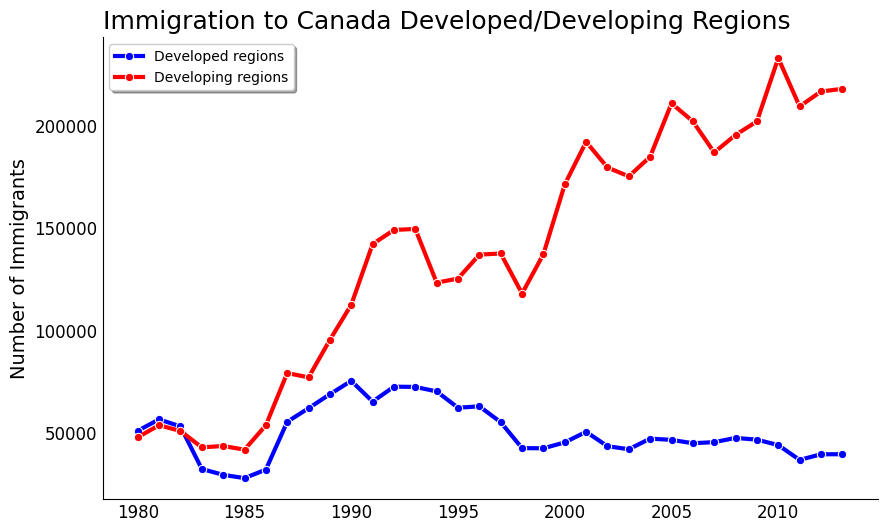

In [11]:
#Serie temporal de imigração por devname

#Criando tabela para consulta
devname1 = data.groupby(by='DevName').sum().T
devname1.drop('Total',axis=0,inplace=True)
devname1

#Criando Figura
fig , ax = plt.subplots(figsize=(10,6))
#Criando Grafico
sns.lineplot(data=devname1,x=devname1.index,y=devname1['Developed regions'],lw=3,color='blue',marker='o',label='Developed regions')
sns.lineplot(data=devname1,x=devname1.index,y=devname1['Developing regions'],lw=3,color='red',marker='o',label='Developing regions')
#Parametros do Grafico
ax.set_title('Immigration to Canada Developed/Developing Regions',loc='left',fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel('Number of Immigrants',fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
plt.legend(shadow=True)
plt.savefig('canada3.png', format='png')
plt.show()



*   Podemos observar que paises em desenvolvimento tendem a enviar mais imigrantes ao canadá;
*   Por volta da metade da decada de 90 os paises menos desenvolvidos passam a enviar menos imigrantes ao canadá.



## Conclusão

Os dados mostram um crescente interesse de pessoas indo morar no canadá, sendo os mais interessados as pessoas que estão em paises menos desenvolvidos e que são de origem asiatica